In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Shopping Mall Customer Segmentation Data .csv to Shopping Mall Customer Segmentation Data .csv


In [3]:
df = pd.read_csv("Shopping Mall Customer Segmentation Data .csv")

In [4]:
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


<Axes: >

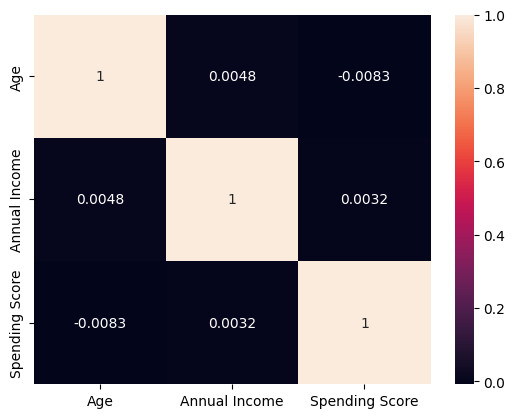

In [12]:
hm = df.drop(["Customer ID", "Gender"], axis=1)

sns.heatmap(hm.corr(), annot=True)

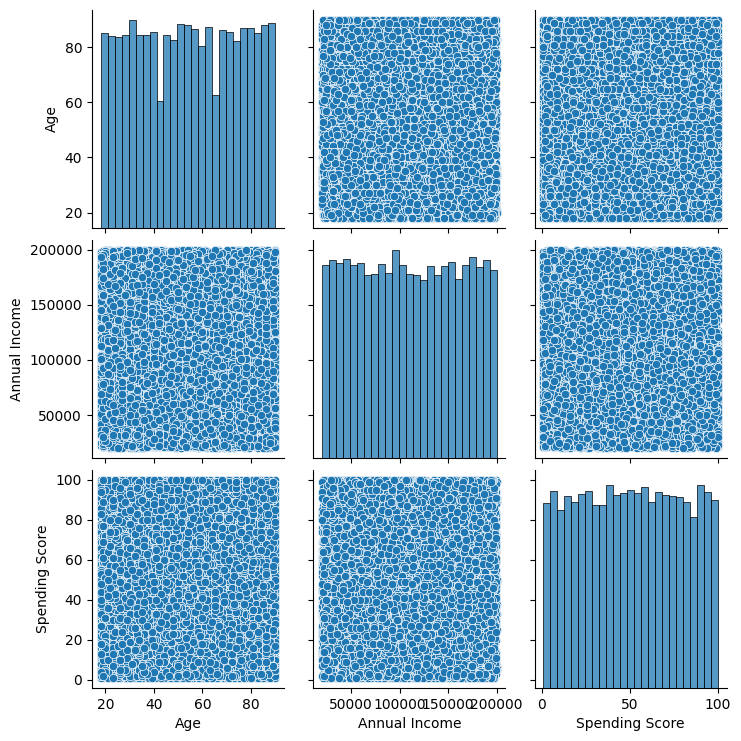

In [17]:
sns.pairplot(df)

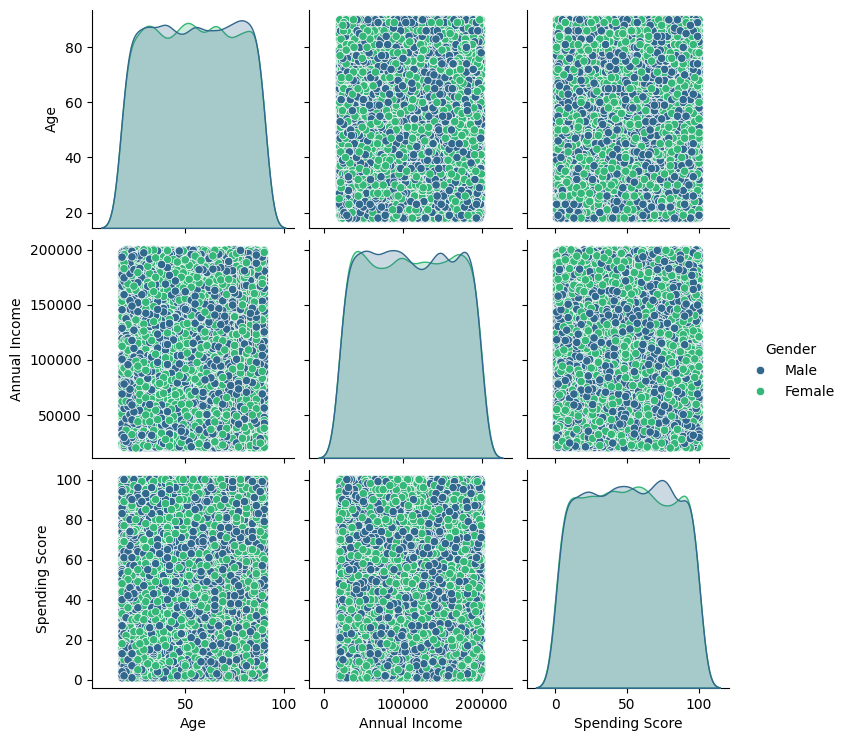

In [18]:
sns.pairplot(df, hue="Gender", palette="viridis")

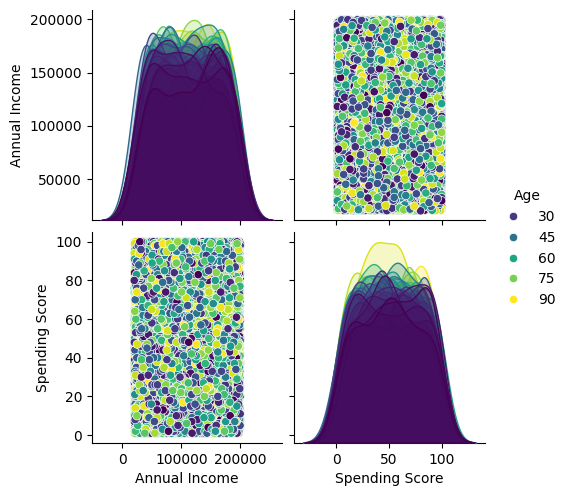

In [19]:
sns.pairplot(df, hue="Age", palette="viridis")

In [20]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

In [21]:
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,0,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,1,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,1,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,0,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,0,153752,76


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
x = df.drop(["Spending Score", "Customer ID", "Gender"], axis=1)
y = df["Spending Score"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=101),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {name}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"R² Score: {r2_score(y_test, y_pred)}\n")

Model: Linear Regression
Mean Absolute Error: 24.450859465774112
Mean Squared Error: 808.1852188328652
R² Score: -0.001284242917451106

Model: Random Forest
Mean Absolute Error: 24.41856724545934
Mean Squared Error: 806.9696257144864
R² Score: 0.0002217908565759208



Model: Linear Regression
Mean Absolute Error: 18.13695255604861
Mean Squared Error: 441.28595633745516
R² Score: -0.0010018924144608032

Model: Random Forest
Mean Absolute Error: 18.163108221175744
Mean Squared Error: 442.49562796054823
R² Score: -0.0037458809020305406



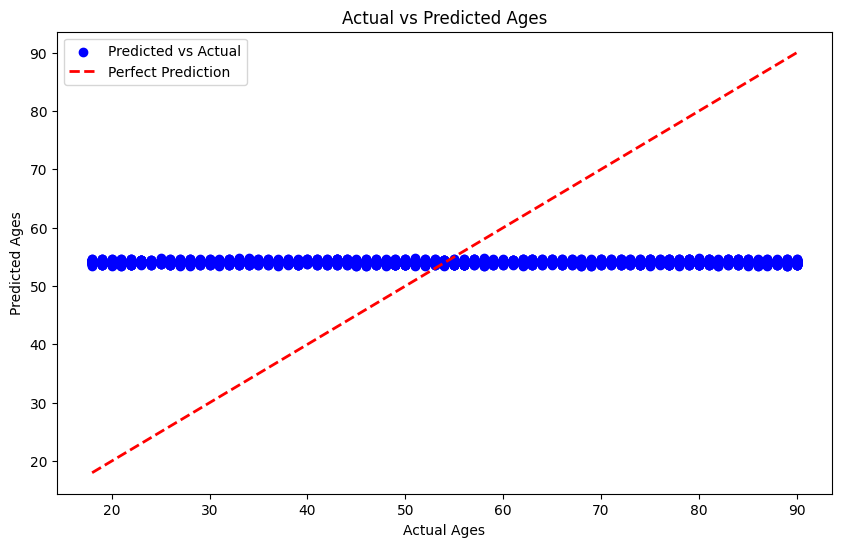

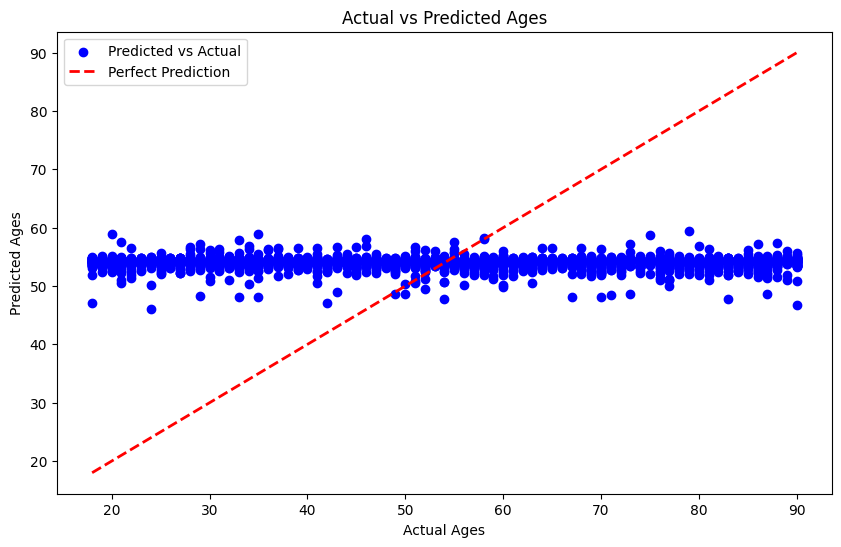

In [31]:
df_sorted = df.sort_values(by="Spending Score", ascending=False)

X = df_sorted[['Spending Score', 'Annual Income', 'Gender']]
y = df_sorted['Age']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {name}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"R² Score: {r2_score(y_test, y_pred)}\n")
    plt.figure(figsize=(10, 6))

    # Scatter plot of actual vs. predicted ages
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

    # Line for perfect prediction
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

    plt.xlabel('Actual Ages')
    plt.ylabel('Predicted Ages')
    plt.title('Actual vs Predicted Ages')
    plt.legend()
